In [1]:
## We have some data about items in sale in diferent Bigmart Establishments, and we want to predict the outlet sale price

## there is a dataframe that we will use as train data, including Item_outlet_Sales column, and there is a table with test data, with diferent items and without Item_Outlet_Sales

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
train_data=pd.read_csv('train_bigmart.csv')
test_data=pd.read_csv('test_bigmart.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

    Type of city       Population
Location Tier-1 ---->100000 and above \
Location Tier-2 ---->50000 to 99999  \
Location Tier-3 ---->20000 to 49999 

In [5]:
train_data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [6]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
## Function: search in Item_Weight column for null values, and replace them by the weight of products with the same Item_Identifier number

train_data_1=train_data.drop('Outlet_Size',axis=1)
def replace_weight(row):
    weight_id=train_data_1[train_data_1['Item_Identifier']==row.Item_Identifier].Item_Weight.mean()
    if row.isnull().any()==True:
        row.Item_Weight=weight_id
    return row
train_data_weight_replaced=train_data_1.apply(replace_weight,axis='columns')

In [8]:
## let's look how many null values do we have now in item_weight column
train_data['Item_Weight']=train_data_weight_replaced['Item_Weight']
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
## now we have to replace null values from Outlet_Size column! Let's replace them by "Medium" size
## deleting 4 rows is much better than deleting 1463!!
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna('Medium')
train_data=train_data.dropna(axis=0)

In [11]:
## let's explore the rest of columns
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
train_data_1=train_data.copy()
train_data_1['Item_Fat_Content']=train_data_1['Item_Fat_Content'].replace('low fat', 'Low Fat')
train_data_1['Item_Fat_Content']=train_data_1['Item_Fat_Content'].replace('reg', 'Regular')
train_data_1['Item_Fat_Content']=train_data_1['Item_Fat_Content'].replace('LF', 'Low Fat')

In [13]:
train_data_1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [14]:
train_data_1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [15]:
## Now let's do the job with test_data

test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
test_data_1=test_data.drop('Outlet_Size',axis=1)
def replace_weight(row):
    weight_id=train_data_1[train_data_1['Item_Identifier']==row.Item_Identifier].Item_Weight.mean()
    if row.isnull().any()==True:
        row.Item_Weight=weight_id
    return row
test_data_weight_replaced=test_data_1.apply(replace_weight,axis='columns')

In [17]:
test_data['Item_Weight']=test_data_weight_replaced['Item_Weight']
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     1
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna('Medium')
test_data['Item_Weight']=test_data['Item_Weight'].fillna(test_data.Item_Weight.mean())
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [19]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [20]:
test_data_1=test_data.copy()
test_data_1['Item_Fat_Content']=test_data_1['Item_Fat_Content'].replace('low fat', 'Low Fat')
test_data_1['Item_Fat_Content']=test_data_1['Item_Fat_Content'].replace('reg', 'Regular')
test_data_1['Item_Fat_Content']=test_data_1['Item_Fat_Content'].replace('LF', 'Low Fat')

## Exploring PDF

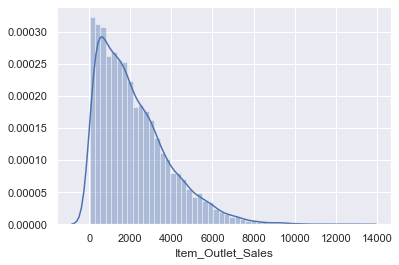

In [21]:
sns.distplot(train_data_1['Item_Outlet_Sales'])

In [22]:
## to deal with outliers, we can drop some data by doing:

q=train_data_1['Item_Outlet_Sales'].quantile(0.99)
train_data_2=train_data_1[train_data_1['Item_Outlet_Sales']<q]
train_data_2.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8433,8433.000000,8433,8433.000000,8433,8433.000000,8433,8433.000000,8433,8433,8433,8433.000000
unique,1555,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT013,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5460,NaN,1216,NaN,928,NaN,5127,3286,5548,NaN
mean,NaN,12.868206,NaN,0.066204,NaN,140.151939,NaN,1997.915807,NaN,NaN,NaN,2116.638677
std,NaN,4.645698,NaN,0.051694,NaN,61.930042,NaN,8.334960,NaN,NaN,NaN,1586.427056
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.775000,NaN,0.026986,NaN,93.412000,NaN,1987.000000,NaN,NaN,NaN,822.263000
50%,NaN,12.600000,NaN,0.053931,NaN,142.015400,NaN,1999.000000,NaN,NaN,NaN,1771.028000
75%,NaN,16.850000,NaN,0.094957,NaN,184.824000,NaN,2004.000000,NaN,NaN,NaN,3057.353600


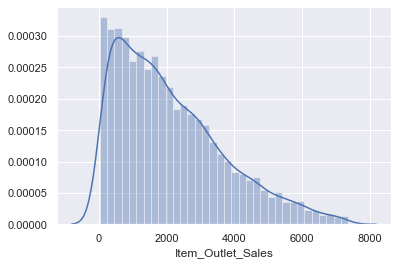

In [23]:
## let's see the new PDF

sns.distplot(train_data_2['Item_Outlet_Sales'])

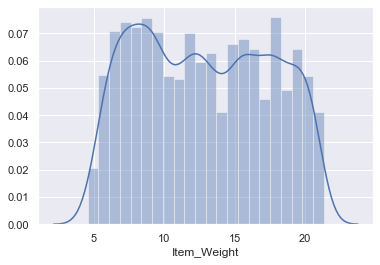

In [24]:
sns.distplot(train_data_2['Item_Weight'])

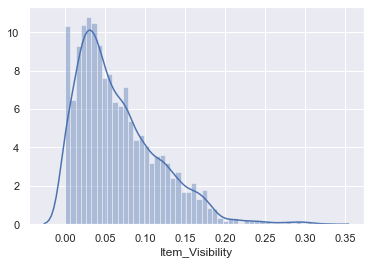

In [25]:
sns.distplot(train_data_2['Item_Visibility'])

In [26]:
## again, we can drop some outliers

q=train_data_2['Item_Visibility'].quantile(0.99)
train_data_3=train_data_2[train_data_2['Item_Visibility']<q]
train_data_3.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8348,8348.000000,8348,8348.000000,8348,8348.000000,8348,8348.000000,8348,8348,8348,8348.000000
unique,1555,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT013,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5409,NaN,1204,NaN,928,NaN,5090,3249,5548,NaN
mean,NaN,12.871515,NaN,0.064146,NaN,140.153721,NaN,1997.989698,NaN,NaN,NaN,2134.625144
std,NaN,4.647169,NaN,0.047658,NaN,61.940529,NaN,8.319509,NaN,NaN,NaN,1584.193857
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.775000,NaN,0.026876,NaN,93.411350,NaN,1987.000000,NaN,NaN,NaN,852.224000
50%,NaN,12.650000,NaN,0.053362,NaN,142.015400,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.093457,NaN,184.826600,NaN,2004.000000,NaN,NaN,NaN,3075.996000


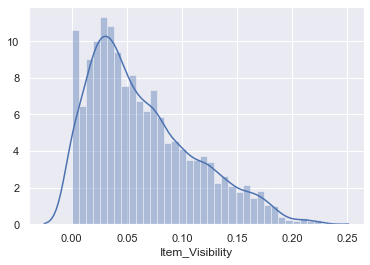

In [27]:
## let's see the new PDF

sns.distplot(train_data_3['Item_Visibility'])


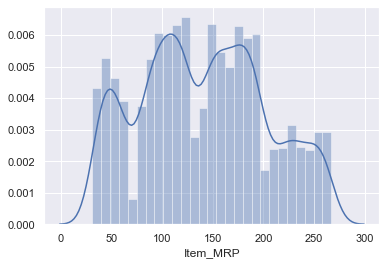

In [28]:
sns.distplot(train_data_3['Item_MRP'])

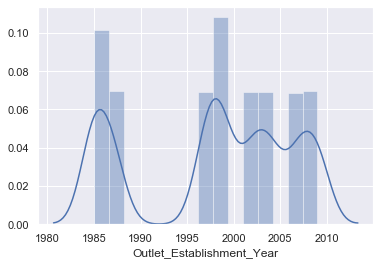

In [29]:
sns.distplot(train_data_3['Outlet_Establishment_Year'])

## Categorical variables

In [30]:
# Get list of categorical variables
s = (train_data_3.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


## One hot encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

object_cols_one_hot_enc=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Make copy to avoid changing original data 
label_train_data = train_data_3.copy()
label_test_data = test_data_1.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols_one_hot_enc:
    label_train_data[col] = label_encoder.fit_transform(train_data_3[col])
    label_test_data[col] = label_encoder.transform(test_data_1[col])

In [32]:
label_train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052


## Dummies

In [33]:
label_train_data=label_train_data.drop('Item_Identifier',axis=1)
data_with_dummies = pd.get_dummies(label_train_data, drop_first=True)
data_with_dummies

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,...,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0,0.016047,249.8092,1999,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,1,0.019278,48.2692,2009,1,2,2,443.4228,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0,0.016760,141.6180,1999,1,0,1,2097.2700,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,1,0.000000,182.0950,1998,1,2,0,732.3800,0,...,0,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,1987,0,2,1,994.7052,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,0,2,1,2778.3834,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,1,0.046982,108.1570,2002,1,1,1,549.2850,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,2004,2,1,1,1193.1136,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,1,0.145221,103.1332,2009,1,2,2,1845.5976,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
label_test_data=label_test_data.drop('Item_Identifier',axis=1)
test_data_with_dummies = pd.get_dummies(label_test_data, drop_first=True)
test_data_with_dummies

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,20.750,0,0.007565,107.8622,1999,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,8.300,1,0.038428,87.3198,2007,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,14.600,0,0.099575,241.7538,1998,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.315,0,0.015388,155.0340,2007,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,13.600,1,0.118599,234.2300,1985,1,2,3,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,1,0.013496,141.3154,1997,2,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5677,7.600,1,0.142991,169.1448,2009,1,2,2,0,0,...,1,0,0,1,0,0,0,0,0,0
5678,10.000,0,0.073529,118.7440,2002,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5679,15.300,1,0.000000,214.6218,2007,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
data_with_dummies.columns.values

array(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049'], dtype=object)

In [35]:
cols=['Item_Outlet_Sales','Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049']

In [42]:
train_data_preprocessed = data_with_dummies[cols]
test_data_preprocessed = test_data_with_dummies[cols[1:]]
data_preprocessed.head()

,Item_Outlet_Sales,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,3735.1380,9.30,0,0.016047,249.8092,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,443.4228,5.92,1,0.019278,48.2692,1,2,2,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2097.2700,17.50,0,0.016760,141.6180,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,732.3800,19.20,1,0.000000,182.0950,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,994.7052,8.93,0,0.000000,53.8614,0,2,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [43]:
train_data_preprocessed.to_csv('train_data_preprocessed.csv')
test_data_preprocessed.to_csv('test_data_preprocessed.csv')